<a href="https://colab.research.google.com/github/lydiandiba/Titanic-Survival-prediction-and-Email-spam-detection/blob/master/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Email Spam detection using the Naive Bayes Classifier 

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> We want to get a model to predict whether an email is spam of ham.

### b) Defining the Metric for Success

> Getting the model with best accuracy
> Simplicity

### d) Recording the Experimental Design

> I will load and read the data, understand my data, clean the data by checking for and removing outliers, missing values and duplicates. I will then perform feature engineering and create my models to find the one with the highest accuracy. Finally, evaluate my models by challenging the solution and give my conclusion.

### e) Data Relevance

The column names are as follows in order;

word_freq_make:         
word_freq_address:     
word_freq_all:          
word_freq_3d:           
word_freq_our:          
word_freq_over:         
word_freq_remove:       
word_freq_internet:     
word_freq_order:        
word_freq_mail:         
word_freq_receive:      
word_freq_will:         
word_freq_people:       
word_freq_report:       
word_freq_addresses:    
word_freq_free:         
word_freq_business:     
word_freq_email:        
word_freq_you:          
word_freq_credit:       
word_freq_your:         
word_freq_font:         
word_freq_000:          
word_freq_money:        
word_freq_hp:           
word_freq_hpl:          
word_freq_george:       
word_freq_650:          
word_freq_lab:          
word_freq_labs:         
word_freq_telnet:       
word_freq_857:          
word_freq_data:         
word_freq_415:          
word_freq_85:           
word_freq_technology:   
word_freq_1999:         
word_freq_parts:        
word_freq_pm:           
word_freq_direct:       
word_freq_cs:           
word_freq_meeting:      
word_freq_original:     
word_freq_project:      
word_freq_re:           
word_freq_edu:          
word_freq_table:        
word_freq_conference:   
char_freq_;:            
char_freq_(:            
char_freq_[:            
char_freq_!:            
char_freq_$:            
char_freq_#:            
capital_run_length_average: 
capital_run_length_longest: 
capital_run_length_total:   

## 2. Reading the Data

In [0]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Improving visual appearance of graphs
sns.set(rc={'figure.figsize':(10, 8)})
# Ensure all columns are displayed
pd.pandas.set_option('display.max_columns', None)

# Hide warnings related to numpy 
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Loading the Data from the source i.e. csv
#
spam = pd.read_csv("spambase.data", header = None)


In [3]:
# Previewing the top of our dataset
#
spam.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1




## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
#
spam.shape

(4601, 58)

Our data has 4601 rows and 58 columns.

In [5]:
# Looking at our variables information
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
0     4601 non-null float64
1     4601 non-null float64
2     4601 non-null float64
3     4601 non-null float64
4     4601 non-null float64
5     4601 non-null float64
6     4601 non-null float64
7     4601 non-null float64
8     4601 non-null float64
9     4601 non-null float64
10    4601 non-null float64
11    4601 non-null float64
12    4601 non-null float64
13    4601 non-null float64
14    4601 non-null float64
15    4601 non-null float64
16    4601 non-null float64
17    4601 non-null float64
18    4601 non-null float64
19    4601 non-null float64
20    4601 non-null float64
21    4601 non-null float64
22    4601 non-null float64
23    4601 non-null float64
24    4601 non-null float64
25    4601 non-null float64
26    4601 non-null float64
27    4601 non-null float64
28    4601 non-null float64
29    4601 non-null float64
30    4601 non-null float64
31    4601 non-null float

In [6]:
# Checking the dataset statistical description
#
spam.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3

##  Tidying the Dataset

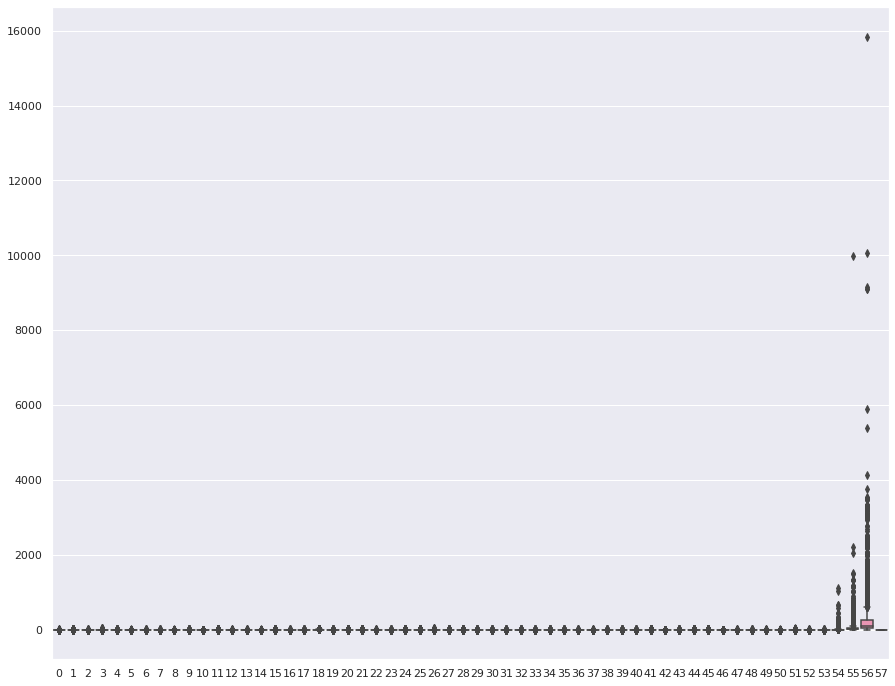

In [7]:
# Checking for Outliers
#
sns.boxplot(data = spam)

We can only see outliers in columns 55 and 56 but we will not drop them.

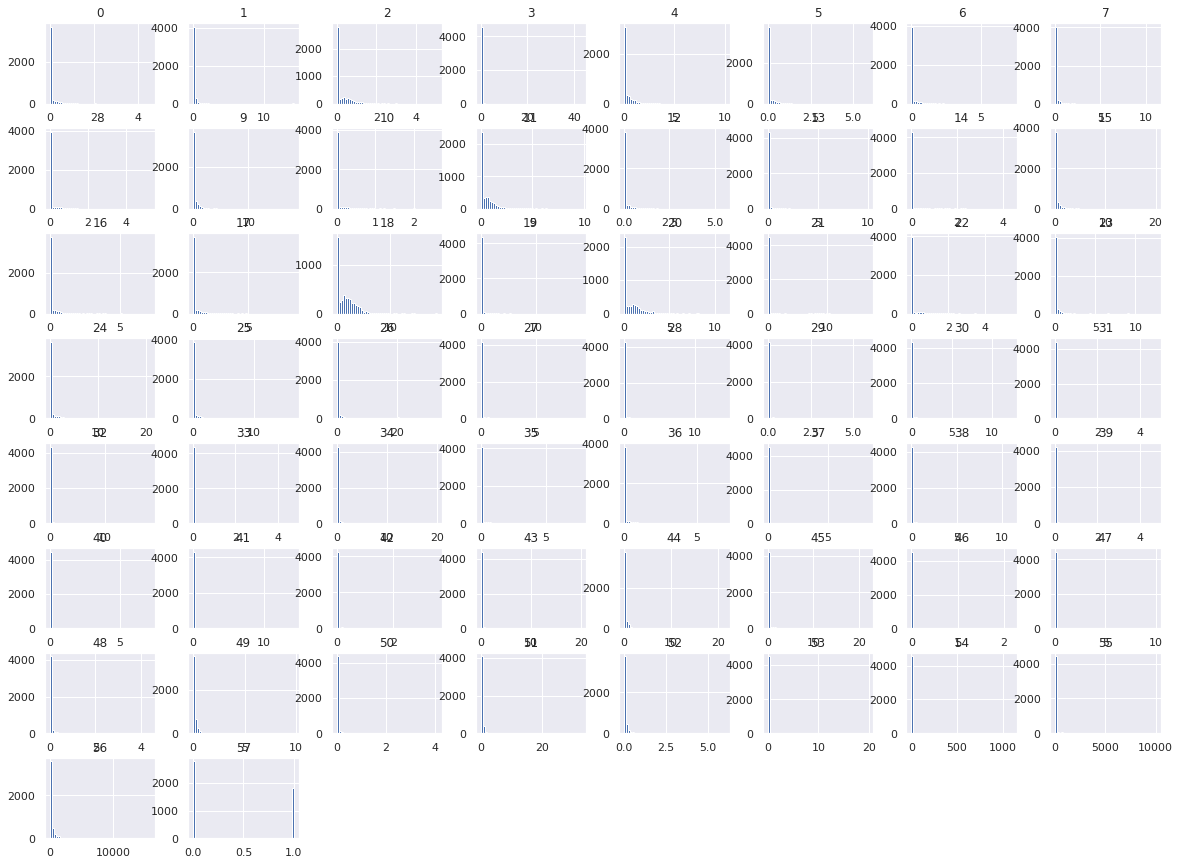

In [8]:
#Distribution plot
spam.hist(bins=50,figsize=(20,15))
plt.show()

All our variables are right skewed so we will ahve to normalize our variables when creating our models.

In [9]:
# Checking for duplicates
#
spam.duplicated().sum()

391

In [0]:
# Dropping the duplicates while keeping the first occurence of the record.

spam.drop_duplicates(keep = 'first', inplace = True)

In [11]:
spam.duplicated().any()

False

In [12]:
# Identifying the Missing Data
#
spam.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
dtype: bool

We dont have any missing values.

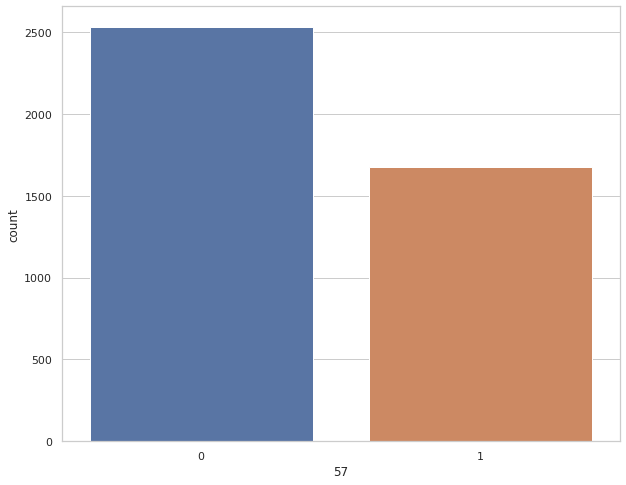

In [16]:
# Visiualizing the spam count
# Spam count.

sns.set(style="whitegrid")
sns.countplot(x=57, data=spam)

We can see that most of the emails were spam

##  Implementing the Solution

We will first try out our modelling using Gaussian Naive Bayes by normalizing the data to see how much accuracy it yields us.

We will the do Bernoulli Naive Bayes and look at our accuracy then decide on which will be our best model.

### Gaussian Naive Bayes Classifier

In [0]:
# Implementing the Solution

# Load libraries 
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
# 
# Splitting the data into dependent and independent sets.

X = spam.drop(57, axis = 1)
y = spam[57]

# Normalizing the features 

from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(X)


# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

# Predicting
#y_pred = gauss.predict(X_test)
y_pred = model.predict(X_test)

# Evaluating our model 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))

print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       480
           1       0.74      0.95      0.83       362

    accuracy                           0.83       842
   macro avg       0.85      0.85      0.83       842
weighted avg       0.86      0.83      0.84       842

[[359 121]
 [ 18 344]]
0.834916864608076


## Bernoulli Naive Bayes Classifier

### Splitting the data into 80-20

In [0]:
from sklearn.naive_bayes import BernoulliNB
# Splitting the data into dependent and independent sets.

X = spam.drop(57, axis = 1)
y = spam[57]

# Normalizing the features 

# from sklearn.preprocessing import Normalizer
# norm = Normalizer().fit(X)


# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Training our model
# 
clf = BernoulliNB () 
model = clf.fit(X_train, y_train) 

# Predicting
#y_pred = gauss.predict(X_test)
y_pred = model.predict(X_test)

# Evaluating our model 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))

print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       480
           1       0.91      0.83      0.87       362

    accuracy                           0.89       842
   macro avg       0.89      0.88      0.89       842
weighted avg       0.89      0.89      0.89       842

[[450  30]
 [ 62 300]]
0.8907363420427553


A 80-40 split gives us a 89% accuracy.

Interpreting the confusion matrix;


The first row is about the non-spam-predictions:
450 emails were correctly classified as Ham (true negatives)
30 were wrongly classified as ham (false positives).

The second row is about the spam-predictions:
62 emails where wrongly classified as spam (false negatives) and
300 were correctly classified as Spam (true positives).

### Spliting the data into 70-30

In [0]:

# Splitting the data into dependent and independent sets.

X = spam.drop(57, axis = 1)
y = spam[57]

# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

# Training our model
# 
clf = BernoulliNB () 
model = clf.fit(X_train, y_train) 

# Predicting
#y_pred = gauss.predict(X_test)
y_pred1 = model.predict(X_test)

# Evaluating our model 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Using Classification report
print(classification_report(y_test, y_pred1))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred1))

print(accuracy_score(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       737
           1       0.89      0.83      0.86       526

    accuracy                           0.89      1263
   macro avg       0.89      0.88      0.88      1263
weighted avg       0.89      0.89      0.89      1263

[[680  57]
 [ 87 439]]
0.8859857482185273


A 70-30 split gives us a 88.5% accuracy.

Interpreting the confusion matrix;


The first row is about the non-spam-predictions:
680 emails were correctly classified as Ham (true negatives)
57 were wrongly classified as ham (false positives).

The second row is about the spam-predictions:
87 emails where wrongly classified as spam (false negatives) and
439 were correctly classified as Spam (true positives).

### Spliting the data into 60-40

In [0]:
# Splitting the data into dependent and independent sets.

X = spam.drop(57, axis = 1)
y = spam[57]

# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=30)

# Training our model
# 
clf = BernoulliNB () 
model = clf.fit(X_train, y_train) 

# Predicting
#y_pred = gauss.predict(X_test)
y_pred2 = model.predict(X_test)

# Evaluating our model 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Using Classification report
print(classification_report(y_test, y_pred2))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred2))

print(accuracy_score(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1023
           1       0.88      0.81      0.84       661

    accuracy                           0.88      1684
   macro avg       0.88      0.87      0.87      1684
weighted avg       0.88      0.88      0.88      1684

[[951  72]
 [127 534]]
0.8818289786223278


The 60-40 split accuracy is 88%

Interpreting the confusion matrix;


The first row is about the non-spam-predictions:
951 emails were correctly classified as Ham (true negatives)
72 were wrongly classified as ham (false positives).

The second row is about the spam-predictions:
127 emails where wrongly classified as spam (false negatives) and
534 were correctly classified as Spam (true positives).

# Conclusion

Since we know that a Bernoulli random variable has two possible outcomes: 0 or 1, The Bernoulli Naive Bayes was the best model for us to use and it yielded best accuracy.

The 80-20 split gave us the best accuracy score at 89%.